In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [4]:
df = pd.read_csv("dataset.csv", delimiter=";")
df.head()

,ID_KEL,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan
0,3172051003,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,1960,2,1921,27,10,NaN
1,3173041007,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,1859,1,1811,34,13,NaN
2,3175041005,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,2143,0,2105,34,4,NaN
3,3175031003,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,873,1,847,18,7,NaN
4,3175101006,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,3026,1,2988,31,6,NaN


In [8]:
df['mortality_rate'] = df['Meninggal']/df['POSITIF']
df['recovery_rate'] = df['Sembuh']/df['POSITIF']
df

,ID_KEL,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan,mortality_rate,recovery_rate
0,3172051003,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,1960,2,1921,27,10,NaN,0.013776,0.980102
1,3173041007,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,1859,1,1811,34,13,NaN,0.018289,0.974180
2,3175041005,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,2143,0,2105,34,4,NaN,0.015866,0.982268
3,3175031003,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,873,1,847,18,7,NaN,0.020619,0.970218
4,3175101006,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,3026,1,2988,31,6,NaN,0.010245,0.987442
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,3175011006,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU SELATAN,3674,7,3580,72,15,NaN,0.019597,0.974415
265,3175011002,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU UTARA,2328,3,2255,60,10,NaN,0.025773,0.968643
266,3171031008,DKI JAKARTA,JAKARTA PUSAT,KEMAYORAN,UTAN PANJANG,1985,4,1933,36,12,NaN,0.018136,0.973804
267,3172021007,DKI JAKARTA,JAKARTA UTARA,TANJUNG PRIOK,WARAKAS,3004,5,2945,44,10,NaN,0.014647,0.980360


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_KEL          269 non-null    object 
 1   Nama_provinsi   269 non-null    object 
 2   nama_kota       269 non-null    object 
 3   nama_kecamatan  269 non-null    object 
 4   nama_kelurahan  269 non-null    object 
 5   POSITIF         269 non-null    int64  
 6   Dirawat         269 non-null    int64  
 7   Sembuh          269 non-null    int64  
 8   Meninggal       269 non-null    int64  
 9   Self Isolation  269 non-null    int64  
 10  Keterangan      0 non-null      float64
 11  mortality_rate  269 non-null    float64
 12  recovery_rate   269 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 27.4+ KB


In [10]:
df = df.set_index("ID_KEL")
df.head()

,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan,mortality_rate,recovery_rate
ID_KEL,,,,,,,,,,,,
3172051003,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,1960,2,1921,27,10,NaN,0.013776,0.980102
3173041007,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,1859,1,1811,34,13,NaN,0.018289,0.974180
3175041005,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,2143,0,2105,34,4,NaN,0.015866,0.982268
3175031003,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,873,1,847,18,7,NaN,0.020619,0.970218
3175101006,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,3026,1,2988,31,6,NaN,0.010245,0.987442


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
std=StandardScaler()

In [12]:
X=df[["mortality_rate","recovery_rate"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X=std.fit_transform(X) 

In [13]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

Text(0.5, 1.0, 'Elbow Method')

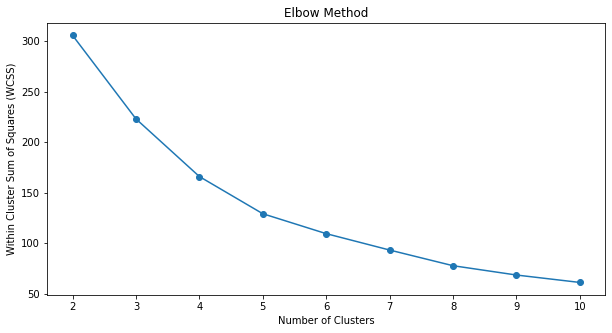

In [18]:
x=np.arange(2,11)
plt.figure(figsize=(10,5))
plt.plot(x,wcss,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method")

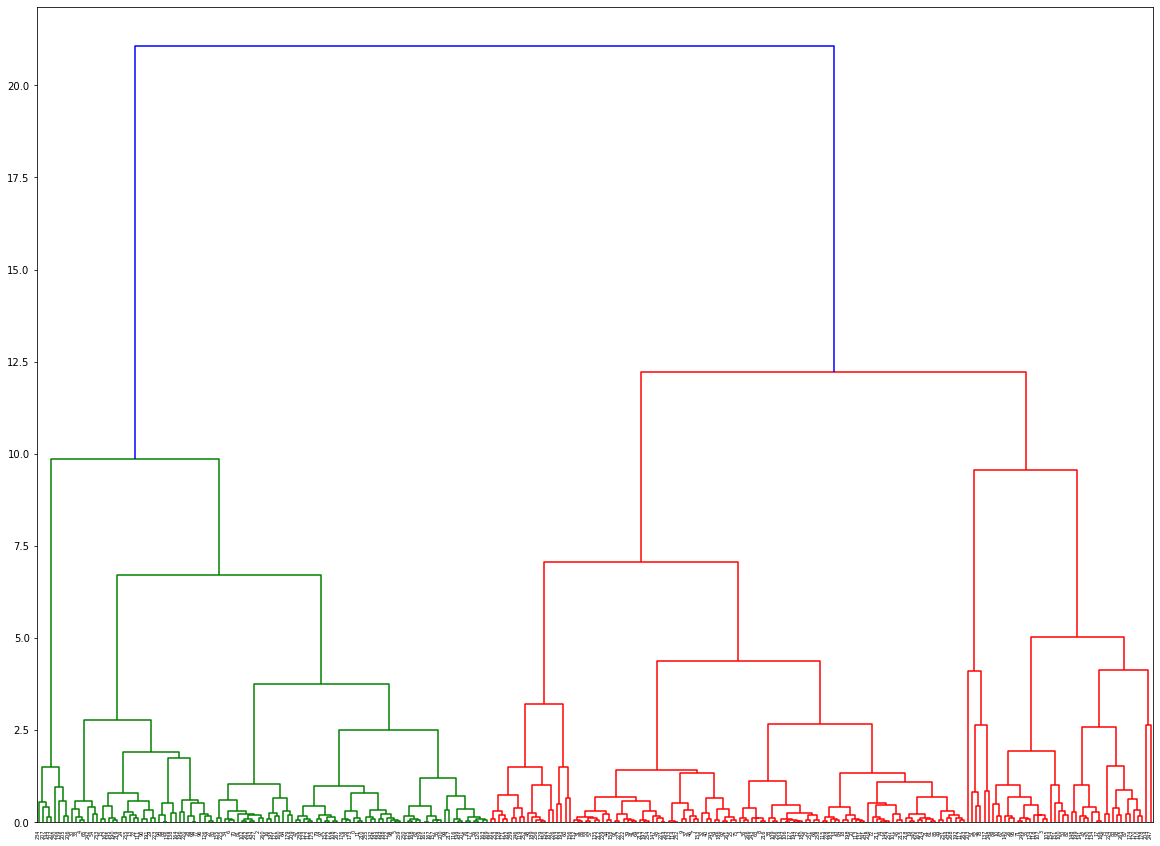

In [19]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendogram=sch.dendrogram(sch.linkage(X, method  = "ward"))

In [20]:
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(n_clusters=3, random_state=6)

In [21]:
df["Clusters"]=clf_final.predict(X)

In [22]:
df

,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan,mortality_rate,recovery_rate,Clusters
ID_KEL,,,,,,,,,,,,,
3172051003,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,1960,2,1921,27,10,NaN,0.013776,0.980102,2
3173041007,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,1859,1,1811,34,13,NaN,0.018289,0.974180,0
3175041005,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,2143,0,2105,34,4,NaN,0.015866,0.982268,0
3175031003,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,873,1,847,18,7,NaN,0.020619,0.970218,1
3175101006,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,3026,1,2988,31,6,NaN,0.010245,0.987442,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175011006,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU SELATAN,3674,7,3580,72,15,NaN,0.019597,0.974415,0
3175011002,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU UTARA,2328,3,2255,60,10,NaN,0.025773,0.968643,1
3171031008,DKI JAKARTA,JAKARTA PUSAT,KEMAYORAN,UTAN PANJANG,1985,4,1933,36,12,NaN,0.018136,0.973804,0


In [25]:
cluster_summary=pd.concat([df[df["Clusters"]==1].head(15),df[df["Clusters"]==2].head(15),df[df["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds')

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan,mortality_rate,recovery_rate,Clusters
ID_KEL,,,,,,,,,,,,,
3175031003,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,873,1,847,18,7,nan,0.020619,0.970218,1
3174101002,DKI JAKARTA,JAKARTA SELATAN,PESANGGRAHAN,BINTARO,3945,5,3819,82,39,nan,0.020786,0.968061,1
3171031006,DKI JAKARTA,JAKARTA PUSAT,KEMAYORAN,CEMPAKA BARU,3046,5,2959,66,16,nan,0.021668,0.971438,1
3171061003,DKI JAKARTA,JAKARTA PUSAT,MENTENG,CIKINI,722,3,699,14,6,nan,0.019391,0.968144,1
3174061005,DKI JAKARTA,JAKARTA SELATAN,CILANDAK,CIPETE SELATAN,2461,3,2388,48,22,nan,0.019504,0.970337,1
3175021003,DKI JAKARTA,JAKARTA TIMUR,PULO GADUNG,CIPINANG,3624,8,3530,76,10,nan,0.020971,0.974062,1
3175031006,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,CIPINANG MUARA,4906,5,4769,113,19,nan,0.023033,0.972075,1
3173051005,DKI JAKARTA,JAKARTA BARAT,KEBON JERUK,DURI KEPA,4279,21,4142,73,43,nan,0.017060,0.967983,1
3171011006,DKI JAKARTA,JAKARTA PUSAT,GAMBIR,DURI PULO,1493,3,1442,29,19,nan,0.019424,0.965841,1
